In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

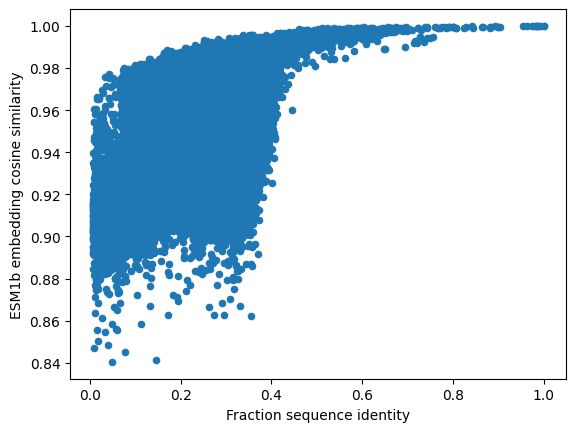

In [2]:
# Parity plot cosine-percent seq identity

df = pd.read_csv("../artifacts/protein_dataset_compare/blast_esm_cosine_similarity_for_500000_random_swissprot_pairs.csv", delimiter='\t')
ax = df.plot(x="Percent Identity", y="Embedding cosine similarity", kind='scatter')
ax.set_xlabel("Fraction sequence identity")
ax.set_ylabel("ESM1b embedding cosine similarity")
plt.show()

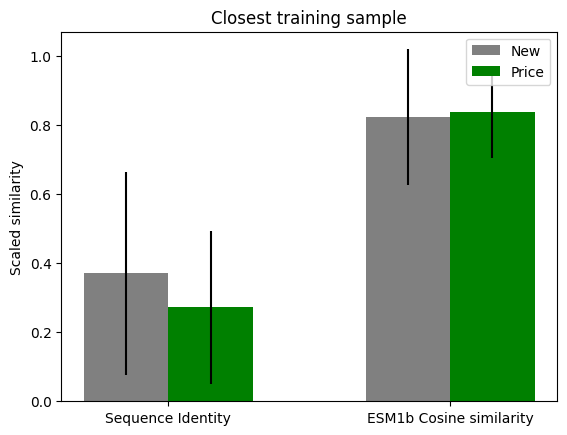

In [23]:
# Compare data sets to swissprot (max stats)

sim_data = {"new":[],
            "price":[]
            }

pi_mins = []
pi_maxes = []
cos_mins = []
cos_maxes = []
for k in sim_data.keys():
    path = f"../artifacts/protein_dataset_compare/swissprot_{k}.csv"
    df = pd.read_csv(path, delimiter='\t')
    cos_mins.append(df.loc[:, "Max cosine similarity"].min())
    cos_maxes.append(df.loc[:, "Max cosine similarity"].max())
    pi_mins.append(df.loc[:, "Max percent identity"].min())
    pi_maxes.append(df.loc[:, "Max percent identity"].max())

cos_min, cos_max = min(cos_mins), max(cos_maxes)
pi_min, pi_max = min(pi_mins), max(pi_maxes)

for k in sim_data.keys():
    path = f"../artifacts/protein_dataset_compare/swissprot_{k}.csv"
    df = pd.read_csv(path, delimiter='\t')
    cos = df.loc[:, "Max cosine similarity"]
    pi = df.loc[:, "Max percent identity"]
    cos = (cos - cos_min) / (cos_max - cos_min)
    pi = (pi - pi_min) / (pi_max - pi_min)
    sim_data[k].append((pi.mean(), pi.std()))
    sim_data[k].append((cos.mean(), cos.std()))

measures = ["Sequence Identity", "ESM1b Cosine similarity"]
x = np.arange(len(measures))
fig, ax = plt.subplots()
width = 0.3
ax.bar(x - width/2, height=[elt[0] for elt in sim_data["new"]], yerr=[elt[1] for elt in sim_data['new']], width=width, color='gray', label="New")
ax.bar(x + width/2, height=[elt[0] for elt in sim_data["price"]], yerr=[elt[1] for elt in sim_data['price']], width=width, color='green', label="Price")
ax.set_xticks(x)
ax.set_xticklabels(measures)
ax.set_title("Closest training sample")
ax.set_ylabel("Scaled similarity")
ax.legend()
plt.show()

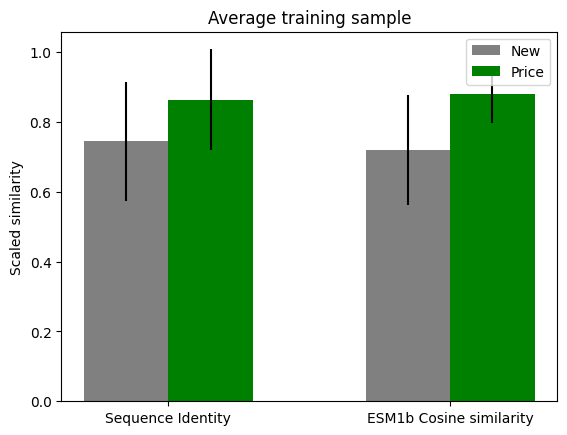

In [22]:
# Compare data sets to swissprot (mean stats)

sim_data = {"new":[],
            "price":[]
            }

pi_mins = []
pi_maxes = []
cos_mins = []
cos_maxes = []
for k in sim_data.keys():
    path = f"../artifacts/protein_dataset_compare/swissprot_{k}.csv"
    df = pd.read_csv(path, delimiter='\t')
    cos_mins.append(df.loc[:, "Mean cosine similarity"].min())
    cos_maxes.append(df.loc[:, "Mean cosine similarity"].max())
    pi_mins.append(df.loc[:, "Mean percent identity"].min())
    pi_maxes.append(df.loc[:, "Mean percent identity"].max())

cos_min, cos_max = min(cos_mins), max(cos_maxes)
pi_min, pi_max = min(pi_mins), max(pi_maxes)

for k in sim_data.keys():
    path = f"../artifacts/protein_dataset_compare/swissprot_{k}.csv"
    df = pd.read_csv(path, delimiter='\t')
    cos = df.loc[:, "Mean cosine similarity"]
    pi = df.loc[:, "Mean percent identity"]
    cos = (cos - cos_min) / (cos_max - cos_min)
    pi = (pi - pi_min) / (pi_max - pi_min)
    sim_data[k].append((pi.mean(), pi.std()))
    sim_data[k].append((cos.mean(), cos.std()))

measures = ["Sequence Identity", "ESM1b Cosine similarity"]
x = np.arange(len(measures))
fig, ax = plt.subplots()
width = 0.3
ax.bar(x - width/2, height=[elt[0] for elt in sim_data["new"]], yerr=[elt[1] for elt in sim_data['new']], width=width, color='gray', label="New")
ax.bar(x + width/2, height=[elt[0] for elt in sim_data["price"]], yerr=[elt[1] for elt in sim_data['price']], width=width, color='green', label="Price")
ax.set_xticks(x)
ax.set_xticklabels(measures)
ax.legend()
ax.set_title("Average training sample")
ax.set_ylabel("Scaled similarity")
plt.show()

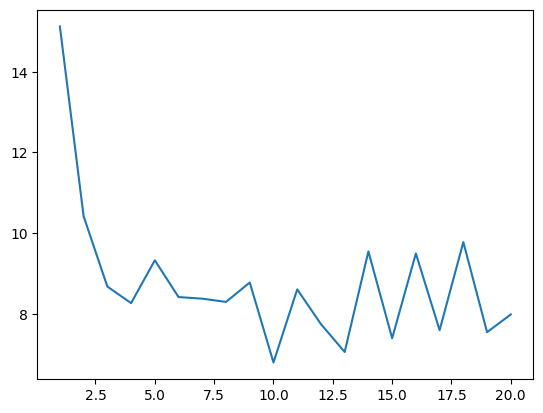

In [3]:
# CV scaling as a function of njobs param to GridSearchCV
# 100 features, 100 classes, 1000 samples
processes = np.arange(1,21)
fit_times_3fold = [15.12, 10.42, 8.68, 8.27, 9.33, 8.42, 8.38, 8.30, 8.78, 6.80, 8.61, 7.75, 7.06, 9.55, 7.40, 9.5, 7.6, 9.78, 7.55, 7.99]
fit_times_5folf = [27.07, 16.81, 13.94, 12.23, 11.90, 11.51, 12.47, 14.05, 14.49, 11.05]
plt.plot(processes, fit_times_3fold)

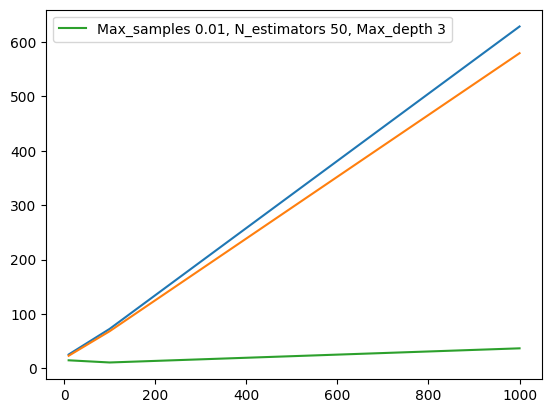

In [7]:
# CV scaling with full features, samples of swissprot

n_samples = [10, 100, 1000]
cv_times_5fold = [25.63, 72.74, 628.52]
cv_times_3fold = [23.32, 68.42, 579.44]
cv_low_end = [15, 11, 37] # Max_samples 0.01, N_estimators 50, Max_depth 3
plt.plot(n_samples, cv_times_5fold)
plt.plot(n_samples, cv_times_3fold)
plt.plot(n_samples, cv_low_end, label="Max_samples 0.01, N_estimators 50, Max_depth 3")
plt.legend()
plt.show()

In [12]:
(37 * 48) / 3600

0.49333333333333335

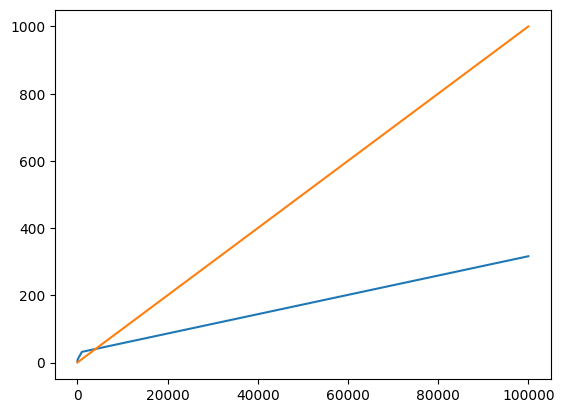

In [11]:
n_samples = np.array([10, 100, 1000, 100000])
p = 0.01
sqrt = np.sqrt(n_samples)
fp = n_samples * p
plt.plot(n_samples, sqrt, label="Sqrt")
plt.plot(n_samples, fp, label=f"{p*100}%")
plt.show()